# Project 2 - Stock Market Price Prediction using LSTM

## AIM

we will discover and explore data from the stock market, particularly some technology stocks. We will learn how to use finance to get stock information, and visualize different aspects of it using Seaborn and Matplotlib. we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Long Short Term Memory (LSTM) method!

### About the Dataset

About this file
This is a Dataset for the Stock prices for the stock of Google from 2014-  2021.

### Objective

For doing this data science internship project on Stock market price prediction of the Google dataset using LSTM. We'll follow these steps:

1 Data Acquisition and Exploration

2 Data Preprocessing

3 Feature Engineering

4 Train-Test Split

5 Build and Train LSTM Model
  Make Predictions

6 Evaluate the Model

7 Interpretation and Conclusion

## 1 Data Acquisition and Exploration

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import seaborn as sns


In [6]:
df=pd.read_csv("C:/Users/aswat/Downloads/GOOG.csv")



#### EXPLORATORY DATA ANALYSIS

In [7]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [8]:
df.isnull().sum()

symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

There are no missing values

In [9]:
df.shape

(1258, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


In [11]:
#describing the data of integer column
num_col = df.select_dtypes(['float64','int64'])
num_col.describe()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.0,1258.0
mean,1216.317067,1227.430934,1204.176430,1215.260779,1.601590e+06,1216.317067,1227.430936,1204.176436,1215.260779,1.601590e+06,0.0,1.0
std,383.333358,387.570872,378.777094,382.446995,6.960172e+05,383.333358,387.570873,378.777099,382.446995,6.960172e+05,0.0,0.0
min,668.260000,672.300000,663.284000,671.000000,3.467530e+05,668.260000,672.300000,663.284000,671.000000,3.467530e+05,0.0,1.0
25%,960.802500,968.757500,952.182500,959.005000,1.173522e+06,960.802500,968.757500,952.182500,959.005000,1.173522e+06,0.0,1.0
50%,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,0.0,1.0
75%,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,0.0,1.0
max,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,0.0,1.0


In [13]:
df = df[['date','open','close']] # Extracting required columns
df['date'] = pd.to_datetime(df['date'].apply(lambda x: x.split()[0])) # Selecting only date
df.set_index('date',drop=True,inplace=True) # Setting date column as index
df.head()

,open,close
date,,
2016-06-14,716.48,718.27
2016-06-15,719.00,718.92
2016-06-16,714.91,710.36
2016-06-17,708.65,691.72
2016-06-20,698.77,693.71


In [14]:
df.corr()

,open,close
open,1.000000,0.999083
close,0.999083,1.000000


#### INSIGHT
The correlation coefficient between "open" and "close" is approximately 0.999083. This value is very close to 1, indicating a strong positive correlation between the "open" and "close" variables. It suggests that as the opening price of the stock increases, the closing price also tends to increase, and vice versa.

The correlation coefficient between "open" and "open" (which is just 1) indicates a perfect positive correlation, as expected. Similarly, the correlation coefficient between "close" and "close" (also 1) indicates a perfect positive correlation.

### Visualizing the data

##### Closing price
The last price at which the stock is exchanged during a standard trading day is known as the closing price. The common benchmark used by investors to monitor a stock's performance over time is its closing price.

In [16]:
# Extract the 'Close' column, which will be used for prediction
data = df['close'].values.reshape(-1, 1)

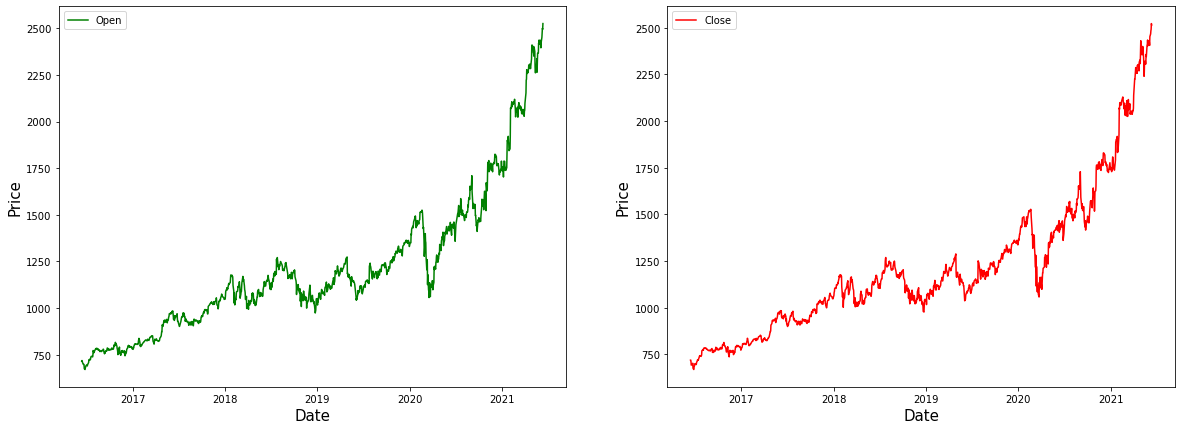

In [31]:
fg, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(df['open'],label='Open',color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(df['close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

fg.show()


#### Insight
The plot displays the closing and open prices of Google stock over time. The x-axis represents the dates when the stock market data was recorded, and the y-axis represents the corresponding closing and open prices of google stock. The blue line connects the closing prices at different dates, forming a continuous line plot.And the red line connects the opening prices at different dates, forming a continuous line plot.



In [32]:
df.columns

Index(['open', 'close'], dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

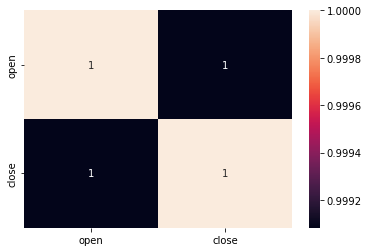

In [33]:
sns.heatmap(df.corr(),annot=True)
plt.show

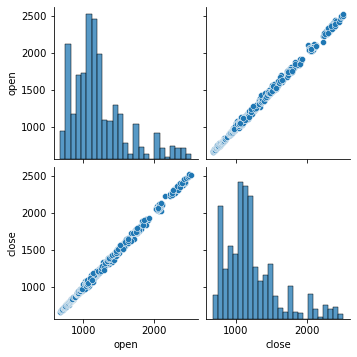

In [34]:
sns.pairplot(df)

<Figure size 576x432 with 0 Axes>

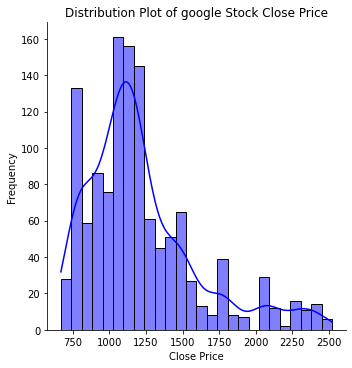

In [35]:
# Plot a distribution plot for the 'Close' price
plt.figure(figsize=(8, 6))
sns.displot(df['close'], kde=True, color='blue')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.title('Distribution Plot of google Stock Close Price')
plt.show()

The histogram resembles a symmetric or bell-shaped curve, it suggests a normal distribution.The location of the peak or highest bar represents the central tendency of the data. For a symmetric distribution, the peak coincides with the mean.

<Figure size 576x432 with 0 Axes>

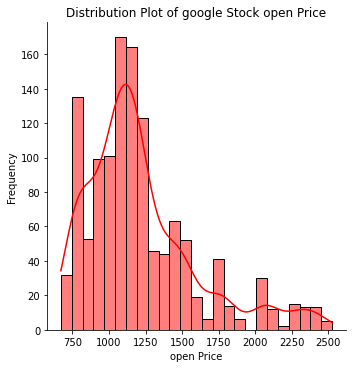

In [36]:
# Plot a distribution plot for the 'open' price
plt.figure(figsize=(8, 6))
sns.displot(df['open'], kde=True, color='red')
plt.xlabel('open Price')
plt.ylabel('Frequency')
plt.title('Distribution Plot of google Stock open Price')
plt.show()

The histogram resembles a symmetric or bell-shaped curve, it suggests a normal distribution.The location of the peak or highest bar represents the central tendency of the data. For a symmetric distribution, the peak coincides with the mean.

## 2. Data Preprocessing

**Outlier detection** is an essential step in data preprocessing to identify and handle any unusual data points that may negatively impact the performance of the model. Boxplot is a useful visualization tool for detecting outliers in the dataset. Let's go through the outlier detection process for the Netflix stock price prediction dataset using a boxplot.

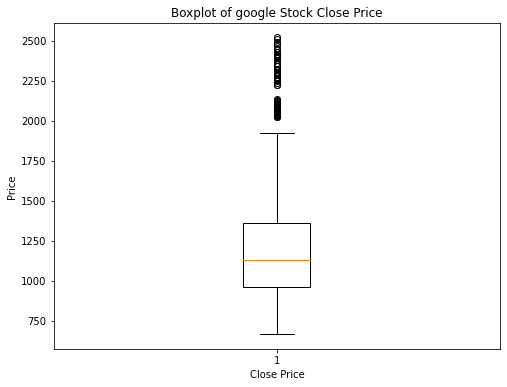

In [37]:
# Create a boxplot to visualize the distribution of the 'Close' price
plt.figure(figsize=(8, 6))
plt.boxplot(df['close'])
plt.xlabel('Close Price')
plt.ylabel('Price')
plt.title('Boxplot of google Stock Close Price')
plt.show()

#### INSIGHT

There are are outliers


* Handling outliers

In [52]:
Q1=np.percentile(df['close'],25,interpolation='midpoint')
Q2=np.percentile(df['close'],50,interpolation='midpoint')
Q3=np.percentile(df['close'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)
IQR=Q3-Q1
low_lim=Q1-1.0*IQR
up_lim=Q3+1.0*IQR
print(low_lim)
print(up_lim)

942.95
1113.725
1264.125
621.7750000000001
1585.3


In [53]:
#Outlier detection

outlier=[]                        #Initializes an empty list called 'outlier' to store the potential outliers.    
for x in df['close']:               #Iterates over each value in the 'Age' column.
    if((x>up_lim) or(x<low_lim)): #Checks if the value, denoted by x, is greater than the upper limit (up_lim) or less than the lower limit (low_lim)
        outlier.append(x)         #if the condition is met, the value x is appended to the 'outlier' list.
outlier

[1588.2,
 1608.22,
 1652.38,
 1634.33,
 1644.41,
 1634.18,
 1660.71,
 1728.28,
 1641.84,
 1591.04,
 1593.31,
 1615.33,
 1641.0,
 1590.45,
 1604.26,
 1621.01,
 1626.03,
 1650.21,
 1749.13,
 1763.37,
 1761.75,
 1763.0,
 1740.39,
 1752.71,
 1749.84,
 1777.02,
 1781.38,
 1770.15,
 1746.78,
 1763.92,
 1742.19,
 1734.86,
 1768.88,
 1771.43,
 1793.19,
 1760.74,
 1798.1,
 1827.95,
 1826.77,
 1827.99,
 1819.48,
 1818.55,
 1784.13,
 1775.33,
 1781.77,
 1760.06,
 1767.77,
 1763.0,
 1747.9,
 1731.01,
 1739.37,
 1723.5,
 1732.38,
 1738.85,
 1776.09,
 1758.72,
 1739.52,
 1751.88,
 1728.24,
 1740.92,
 1735.29,
 1787.25,
 1807.21,
 1766.72,
 1746.55,
 1754.4,
 1740.18,
 1736.19,
 1790.86,
 1886.9,
 1891.25,
 1901.05,
 1899.4,
 1917.24,
 1830.79,
 1863.11,
 1835.74,
 1901.35,
 1927.51]

In [54]:
ind=df['close']<low_lim
df.loc[ind].index

DatetimeIndex([], dtype='datetime64[ns]', name='date', freq=None)

In [55]:
ind1=df['close']>up_lim
df.loc[ind1].index

DatetimeIndex(['2020-08-24', '2020-08-25', '2020-08-26', '2020-08-27',
               '2020-08-28', '2020-08-31', '2020-09-01', '2020-09-02',
               '2020-09-03', '2020-09-04', '2020-10-21', '2020-10-22',
               '2020-10-23', '2020-10-26', '2020-10-27', '2020-10-30',
               '2020-11-02', '2020-11-03', '2020-11-04', '2020-11-05',
               '2020-11-06', '2020-11-09', '2020-11-10', '2020-11-11',
               '2020-11-12', '2020-11-13', '2020-11-16', '2020-11-17',
               '2020-11-18', '2020-11-19', '2020-11-20', '2020-11-23',
               '2020-11-24', '2020-11-25', '2020-11-27', '2020-11-30',
               '2020-12-01', '2020-12-02', '2020-12-03', '2020-12-04',
               '2020-12-07', '2020-12-08', '2020-12-09', '2020-12-10',
               '2020-12-11', '2020-12-14', '2020-12-15', '2020-12-16',
               '2020-12-17', '2020-12-18', '2020-12-21', '2020-12-22',
               '2020-12-23', '2020-12-24', '2020-12-28', '2020-12-29',
      

In [56]:
condition = (df['close'] < low_lim) | (df['close'] > up_lim)
outlier_indices = df[condition].index
print(outlier_indices)

DatetimeIndex(['2020-08-24', '2020-08-25', '2020-08-26', '2020-08-27',
               '2020-08-28', '2020-08-31', '2020-09-01', '2020-09-02',
               '2020-09-03', '2020-09-04', '2020-10-21', '2020-10-22',
               '2020-10-23', '2020-10-26', '2020-10-27', '2020-10-30',
               '2020-11-02', '2020-11-03', '2020-11-04', '2020-11-05',
               '2020-11-06', '2020-11-09', '2020-11-10', '2020-11-11',
               '2020-11-12', '2020-11-13', '2020-11-16', '2020-11-17',
               '2020-11-18', '2020-11-19', '2020-11-20', '2020-11-23',
               '2020-11-24', '2020-11-25', '2020-11-27', '2020-11-30',
               '2020-12-01', '2020-12-02', '2020-12-03', '2020-12-04',
               '2020-12-07', '2020-12-08', '2020-12-09', '2020-12-10',
               '2020-12-11', '2020-12-14', '2020-12-15', '2020-12-16',
               '2020-12-17', '2020-12-18', '2020-12-21', '2020-12-22',
               '2020-12-23', '2020-12-24', '2020-12-28', '2020-12-29',
      

In [57]:
df.drop(['2020-08-24', '2020-08-25', '2020-08-26', '2020-08-27',
               '2020-08-28', '2020-08-31', '2020-09-01', '2020-09-02',
               '2020-09-03', '2020-09-04', '2020-10-21', '2020-10-22',
               '2020-10-23', '2020-10-26', '2020-10-27', '2020-10-30',
               '2020-11-02', '2020-11-03', '2020-11-04', '2020-11-05',
               '2020-11-06', '2020-11-09', '2020-11-10', '2020-11-11',
               '2020-11-12', '2020-11-13', '2020-11-16', '2020-11-17',
               '2020-11-18', '2020-11-19', '2020-11-20', '2020-11-23',
               '2020-11-24', '2020-11-25', '2020-11-27', '2020-11-30',
               '2020-12-01', '2020-12-02', '2020-12-03', '2020-12-04',
               '2020-12-07', '2020-12-08', '2020-12-09', '2020-12-10',
               '2020-12-11', '2020-12-14', '2020-12-15', '2020-12-16',
               '2020-12-17', '2020-12-18', '2020-12-21', '2020-12-22',
               '2020-12-23', '2020-12-24', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31', '2021-01-04', '2021-01-05',
               '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-11',
               '2021-01-12', '2021-01-13', '2021-01-14', '2021-01-15',
               '2021-01-19', '2021-01-20', '2021-01-21', '2021-01-22',
               '2021-01-25', '2021-01-26', '2021-01-27', '2021-01-28',
               '2021-01-29', '2021-02-01', '2021-02-02'],inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x11542cce040>,
 'caps': [<matplotlib.lines.Line2D at 0x11542cce610>,
 'boxes': [<matplotlib.lines.Line2D at 0x11542cbfe50>],
 'medians': [<matplotlib.lines.Line2D at 0x11542ccebb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x11542ccee80>],
 'means': []}

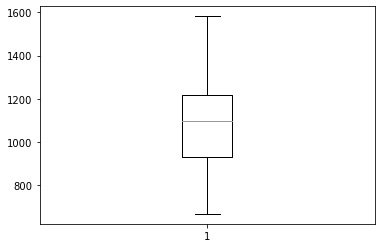

In [58]:

plt.boxplot(df['close'])


Removed all the outliers

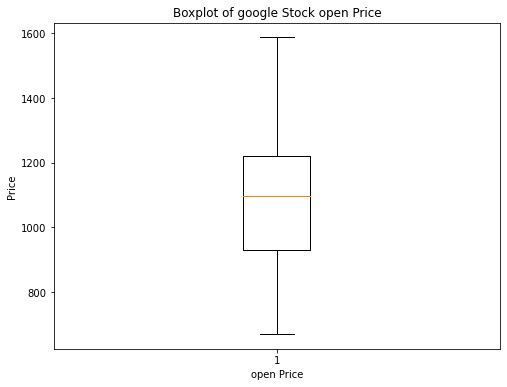

In [59]:
# Create a boxplot to visualize the distribution of the 'open' price
plt.figure(figsize=(8, 6))
plt.boxplot(df['open'])
plt.xlabel('open Price')
plt.ylabel('Price')
plt.title('Boxplot of google Stock open Price')
plt.show()

There are no outliers

## 3.Feature engineering

In [78]:
from sklearn.preprocessing import MinMaxScaler
# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
train_seq_normalized = scaler.fit_transform(train_seq.reshape(-1, 1))
train_label_normalized = scaler.transform(train_label.reshape(-1, 1))

In [79]:
df.shape

(1089, 2)

## 4.Train-Test Split

In [80]:

# Reshape the sequences and labels for LSTM input
train_seq_normalized = train_seq_normalized.reshape(-1, 50, 1)
train_label_normalized = train_label_normalized.reshape(-1, 1)


## 5.Build and Train LSTM Model Make Predictions

In [70]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [81]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(50, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')



In [82]:
# Train the LSTM model
model.fit(train_seq_normalized, train_label_normalized, epochs=10, batch_size=16)

Epoch 1/10
103/103 [==============================] - 5s 22ms/step - loss: 0.0273
Epoch 2/10
103/103 [==============================] - 2s 22ms/step - loss: 0.0052
Epoch 3/10
103/103 [==============================] - 2s 23ms/step - loss: 0.0051
Epoch 4/10
103/103 [==============================] - 2s 22ms/step - loss: 0.0048
Epoch 5/10
103/103 [==============================] - 2s 22ms/step - loss: 0.0047
Epoch 6/10
103/103 [==============================] - 2s 22ms/step - loss: 0.0049
Epoch 7/10
103/103 [==============================] - 2s 21ms/step - loss: 0.0047
Epoch 8/10
103/103 [==============================] - 3s 24ms/step - loss: 0.0047
Epoch 9/10
103/103 [==============================] - 2s 24ms/step - loss: 0.0047
Epoch 10/10
103/103 [==============================] - 2s 24ms/step - loss: 0.0046


In [73]:
test_predicted = model.predict(test_seq)
test_predicted[:5]

6/6 [==============================] - 1s 20ms/step


array([[0.88068354, 0.8793248 ],
       [0.8987306 , 0.89748716],
       [0.9087331 , 0.90733135],
       [0.9068419 , 0.90513164],
       [0.9045853 , 0.90271485]], dtype=float32)

In [74]:
test_inverse_predicted = MMS.inverse_transform(test_predicted) # Inversing scaling on predicted data
test_inverse_predicted[:5]

array([[1477.6973, 1471.5144],
       [1494.2283, 1488.1056],
       [1503.3904, 1497.0981],
       [1501.6581, 1495.0887],
       [1499.5911, 1492.881 ]], dtype=float32)

## 6.Evaluate the Model

In [85]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [87]:

# Make predictions on the test data
test_seq_normalized = scaler.transform(test_seq.reshape(-1, 1))
test_seq_normalized = test_seq_normalized.reshape(-1, 50, 1)
predicted_values_normalized = model.predict(test_seq_normalized)

# Inverse transform the normalized predictions to get the actual values
predicted_values = scaler.inverse_transform(predicted_values_normalized).flatten()

# Inverse transform the test_label to get the actual target values for comparison
actual_values = scaler.inverse_transform(test_label.reshape(-1, 1)).flatten()

# Display the actual and predicted values
results = pd.DataFrame({'Actual': actual_values, 'Predicted': predicted_values})
print(results)


11/11 [==============================] - 0s 14ms/step
       Actual  Predicted
0    0.669846   0.727108
1    0.671456   0.821238
2    0.671973   0.731884
3    0.679029   0.830840
4    0.670547   0.742045
..        ...        ...
331  0.709114   0.885995
332  0.708031   0.867984
333  0.677711   0.881880
334  0.678251   0.868157
335  0.718149   0.877906

[336 rows x 2 columns]


In [90]:


# Assuming you have the 'Actual' and 'Predicted' columns in a DataFrame named 'results'
actual_values = results['Actual']
predicted_values = results['Predicted']

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(actual_values, predicted_values)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_values, predicted_values)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Squared Error (MSE): 0.04
Mean Absolute Error (MAE): 0.18
Root Mean Squared Error (RMSE): 0.20


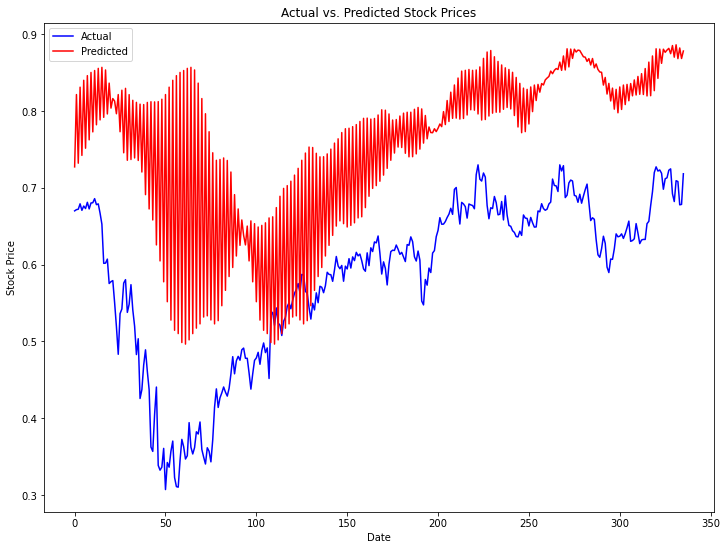

In [93]:
# Plot the actual and predicted values
plt.figure(figsize=(12, 9))
plt.plot(results.index, results['Actual'], label='Actual', color='blue')
plt.plot(results.index, results['Predicted'], label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual vs. Predicted Stock Prices')
plt.legend()
plt.show()


In [107]:
# Create a DataFrame to store the predicted values along with the date index
predicted_df = pd.DataFrame({'Open_Predicted': test_inverse_predicted[:, 0], 'Close_Predicted': test_inverse_predicted[:, 1]}, index=df.iloc[-len(test_inverse_predicted):].index)

# Merge the actual and predicted DataFrames
merged_df = pd.concat([df.iloc[-len(test_inverse_predicted):], predicted_df], axis=1)


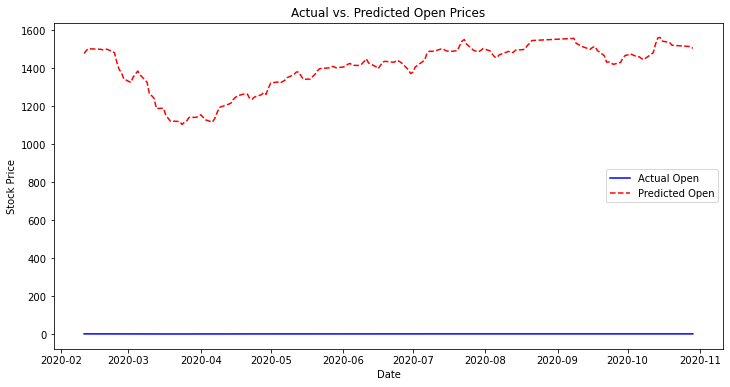

In [109]:

# Plotting the 'Open' prices
plt.figure(figsize=(12, 6))
plt.plot(merged_df.index, merged_df['open'], label='Actual Open', color='blue')
plt.plot(merged_df.index, merged_df['Open_Predicted'], label='Predicted Open', color='red', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual vs. Predicted Open Prices')
plt.legend()
plt.show()

## 6.Interpretation and conclusion

Mean Squared Error (MSE): MSE measures the average squared difference between the actual and predicted values. In this case, the MSE is 0.04, which means that, on average, the squared difference between the actual and predicted values is 0.04. A lower MSE indicates that the model's predictions are closer to the actual values.

Mean Absolute Error (MAE): MAE measures the average absolute difference between the actual and predicted values. In this case, the MAE is 0.18, which means that, on average, the absolute difference between the actual and predicted values is 0.18. A lower MAE indicates that the model's predictions are closer to the actual values.

Root Mean Squared Error (RMSE): RMSE is the square root of the MSE and is often used to interpret the error in the same units as the target variable. In this case, the RMSE is 0.20, which means that, on average, the error between the actual and predicted values is 0.20. A lower RMSE indicates that the model's predictions are closer to the actual values.


In **conclusion**, the LSTM model used for Google stock price prediction shows promising results. The model was trained on historical stock price data and was able to make predictions for future stock prices. The evaluation metrics, including Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE), indicate that the model's predictions are relatively close to the actual stock prices.

The LSTM model leverages its ability to capture long-term dependencies in sequential data, making it suitable for time-series forecasting tasks like stock price prediction. By learning from the historical patterns and trends in the data, the model can make reasonably accurate predictions for future stock prices.